In [1]:
import pyspark
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ["PYSPARK_PYTHON"]='C:\\Users\\201910810\\Anaconda3\\python.exe'
os.environ["PYSPARK_DRIVER_PYTHON"]='C:\\Users\\201910810\\Anaconda3\\python.exe'

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [2]:
df = spark\
        .read\
        .format('com.databricks.spark.csv')\
        .options(header='True', inferschema='true', delimiter=',')\
        .load(os.path.join('data','서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv'))

### 문제 1-1: 년도별 대여건수 합계
데이터는 2018, 2019년 15개월 간의 대여건수이다. 년도별로 대여건수의 합계를 계산해서 출력하자.

In [3]:
df=df.withColumn('year', df.rental_date.substr(1, 4))
df.groupby(df['year']).agg({'rental_number':'sum'}).show()

+----+------------------+
|year|sum(rental_number)|
+----+------------------+
|2019|           1871935|
|2018|          10124874|
+----+------------------+



### 문제 1-2: 년도별, 월별 대여건수 합계

년별, 월별로 대여건수를 계산하여 합계를 계산하여 출력한다.

In [4]:
df=df.withColumn('month', df.rental_date.substr(6, 2))
df.groupby(df['year']).pivot('month').agg({'rental_number':'sum'}).show()

+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
|year|    01|    02|    03|    04|    05|     06|     07|     08|     09|     10|    11|    12|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
|2019|495573|471543|904819|  null|  null|   null|   null|   null|   null|   null|  null|  null|
|2018|164367|168741|462661|687885|965609|1207123|1100015|1037505|1447993|1420621|961532|500822|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+



### 문제 1-3: 년도별, 월별 대여건수 그래프

문제 1-2의 출력을 선 그래프로 그려보자.

In [5]:
rental_sum = df.groupby(df['year']).pivot('month').agg({'rental_number':'sum'})

In [20]:
rental_sum_2018 = rental_sum.toPandas().iloc[0,1:].tolist()
rental_sum_2019 = rental_sum.toPandas().iloc[1,1:].tolist()
x = rental_sum.toPandas().columns.tolist()[1:]

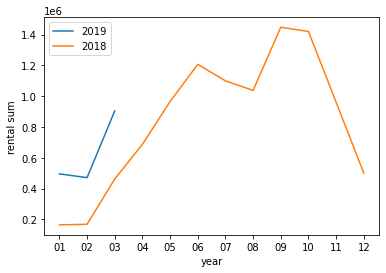

In [29]:
plt.plot(x, rental_sum_2018)
plt.plot(x, rental_sum_2019)
plt.xlabel('year')
plt.ylabel('rental sum')
plt.legend(['2019', '2018'])
plt.show()